<a href="https://colab.research.google.com/github/lugabrield/Data-Wrangling-RFM-Ecommerce/blob/main/RID166710_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data.csv', encoding='cp1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
filter_price = df['UnitPrice'].isna() | (df['UnitPrice'] <= 0)
price_missing_values = filter_price.sum()
print(price_missing_values)

40


In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
filter_quantity = df['Quantity'].isna() | (df['Quantity'] <= 0)
quantity_missing_values = filter_quantity.sum()
print(quantity_missing_values)

8905


In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
duplicate = df.duplicated().sum()
print(duplicate)

5192


In [ ]:
df = df.drop_duplicates()
duplicate = df.duplicated().sum()
print(duplicate)

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  Int64         
 7   Country      392692 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.3+ MB


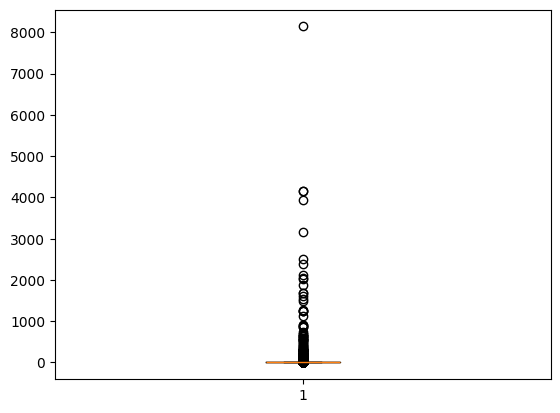

In [ ]:
plt.boxplot(df['UnitPrice'])
plt.show()

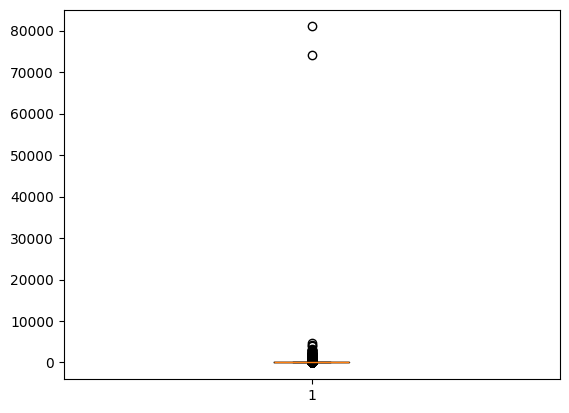

In [ ]:
plt.boxplot(df['Quantity'])
plt.show()

In [ ]:
outliers = df[(df['Quantity'] > 10000) | (df['UnitPrice'] > 5000)]
print(outliers)

       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
173382    551697      POST                         POSTAGE         1   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  
61619  2011-01-18 10:01:00       1.04       12346  United Kingdom  
173382 2011-05-03 13:46:00    8142.75       16029  United Kingdom  
540421 2011-12-09 09:15:00       2.08       16446  United Kingdom  


In [ ]:
df = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

In [ ]:
print(f'max_quantity = {df["Quantity"].max()} and max_price = {df["UnitPrice"].max()}')

max_quantity = 4800 and max_price = 4161.06


In [ ]:
df['Total'] = df['Quantity'] * df['UnitPrice']

<ipython-input-725-b29b50d41941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
last_purchase = df['InvoiceDate'].max()
print(last_purchase)

2011-12-09 12:50:00


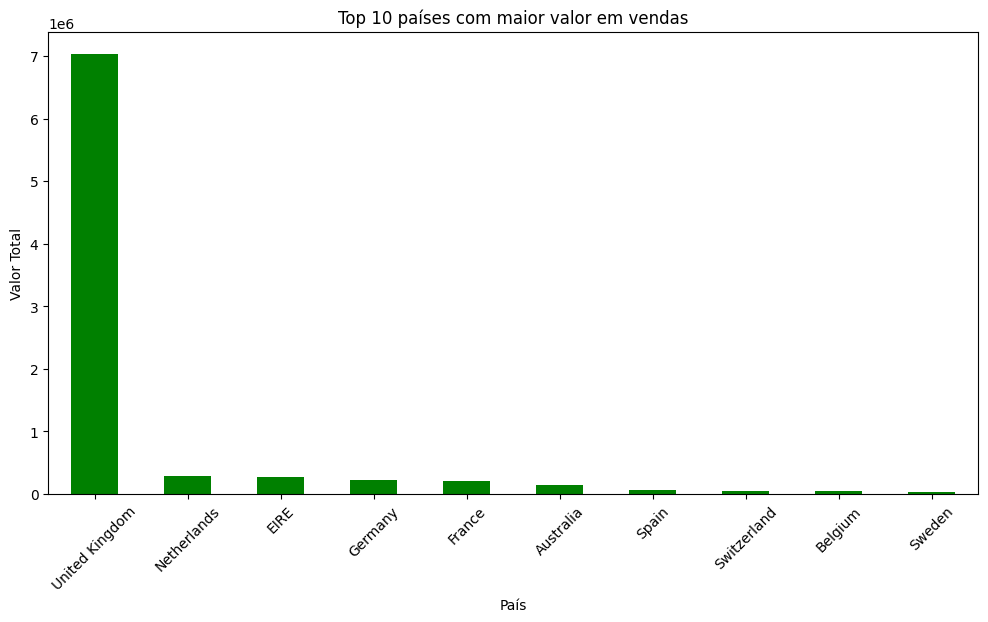

In [ ]:
#Top 10 países com maior valor em vendas
country_sales = df.groupby('Country')['Total'].sum().sort_values(ascending=False)
top_10_countries = country_sales.head(10)

plt.figure(figsize=(12,6))
top_10_countries.plot(kind='bar',color='green')
plt.title('Top 10 países com maior valor em vendas')
plt.xlabel('País')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.show()

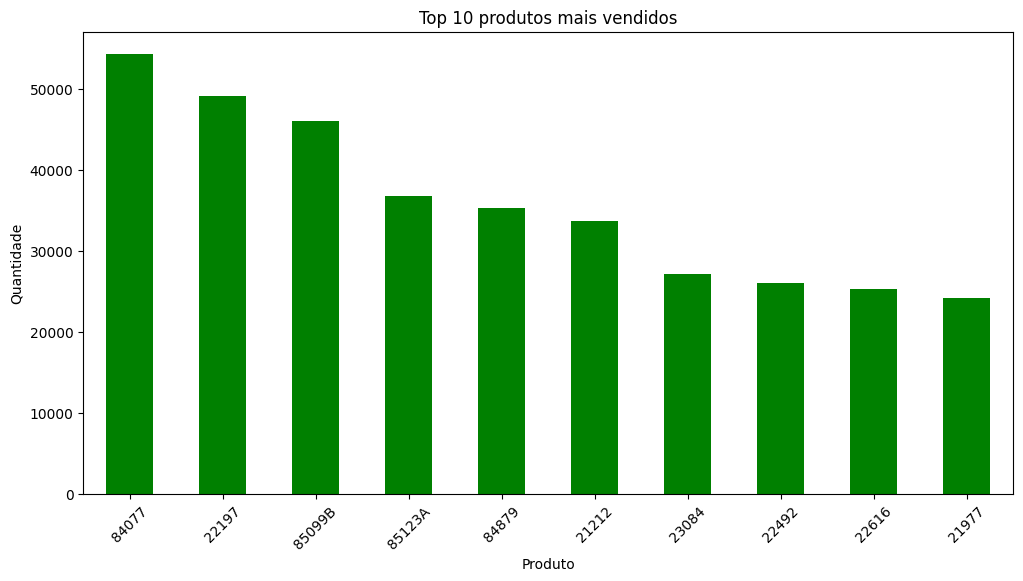

In [ ]:
#Top 10 produtos mais vendidos
product_sales = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
top_10_products = product_sales.head(10)

plt.figure(figsize=(12,6))
top_10_products.plot(kind='bar',color='green')
plt.title('Top 10 produtos mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

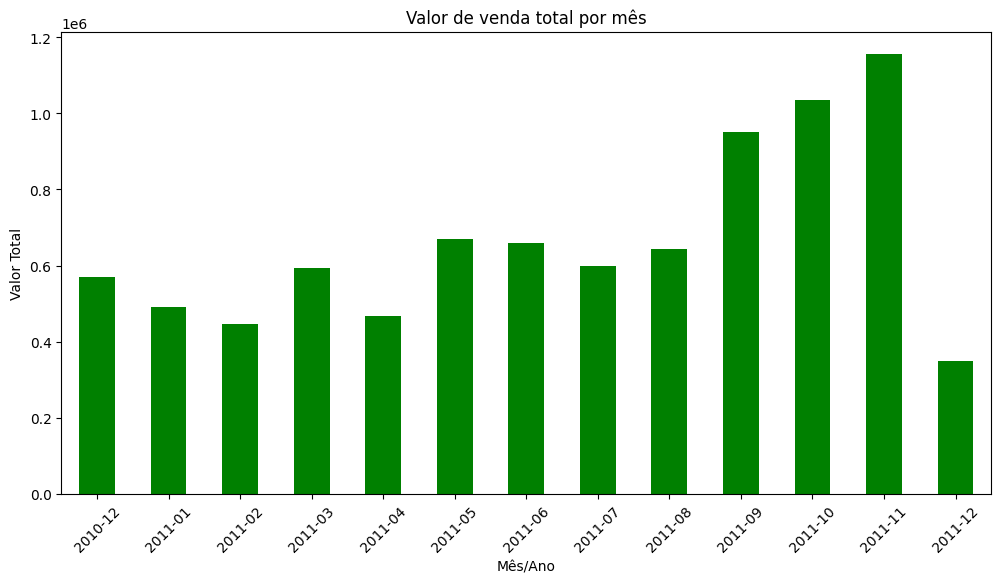

In [ ]:
#Valor de venda total por mês
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['Total'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar',color='green')
plt.title('Valor de venda total por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.show()

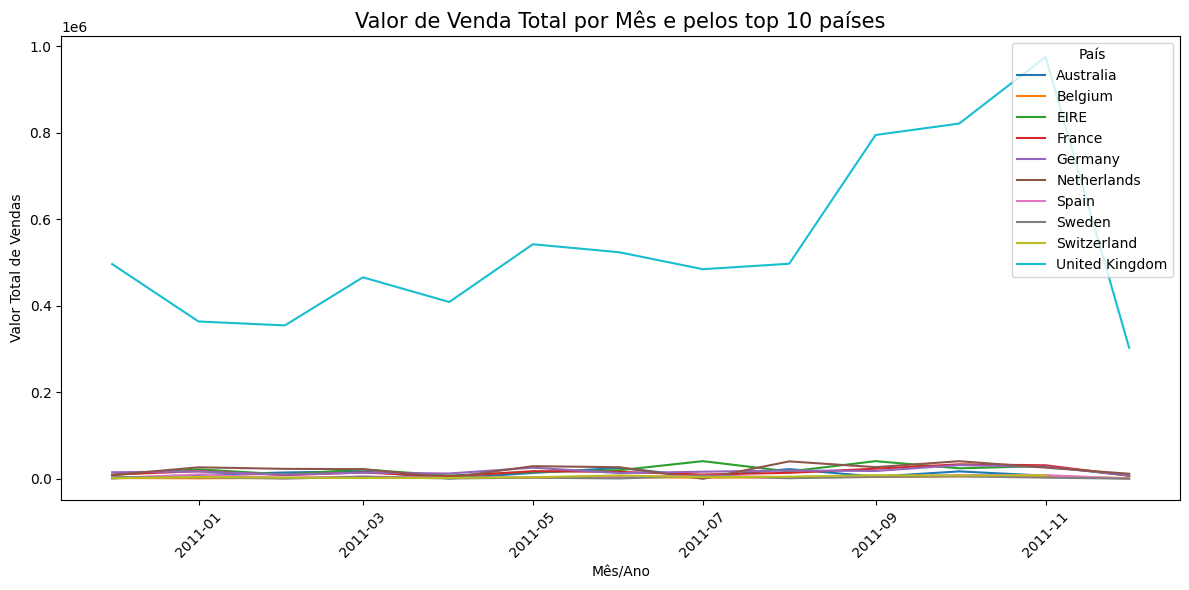

In [ ]:
#Filtro para pegar os top 10 países
top_10_countries_list = top_10_countries.index
df_top_10_countries = df[df['Country'].isin(top_10_countries_list)]

monthly_country_sales = df_top_10_countries.groupby(['MonthYear','Country'])['Total'].sum().reset_index()

#Convertendo para datetime e transformando em index
monthly_country_sales['MonthYear'] = monthly_country_sales['MonthYear'].dt.to_timestamp()
monthly_country_sales.set_index('MonthYear', inplace=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_country_sales, x='MonthYear',y='Total',hue='Country')
plt.title('Valor de Venda Total por Mês e pelos top 10 países',fontsize=15)
plt.xlabel('Mês/Ano',fontsize=10)
plt.ylabel('Valor Total de Vendas',fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='País')

plt.tight_layout()
plt.show()


In [ ]:
rfm = df.groupby('CustomerID').agg(
    recency=('InvoiceDate',lambda x: (last_purchase - x.max()).days),
    frequency=('InvoiceNo','nunique'),
    monetary=('Total','sum')
).reset_index()

rfm['AverageTicket'] = rfm['monetary'] / rfm['frequency']
print(rfm.head())

   CustomerID  recency  frequency  monetary  AverageTicket
0       12347        1          7   4310.00     615.714286
1       12348       74          4   1797.24     449.310000
2       12349       18          1   1757.55    1757.550000
3       12350      309          1    334.40     334.400000
4       12352       35          8   2506.04     313.255000
